In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.signal as signal
import scipy.interpolate as spl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [3]:
file_loc = '/home/devlamin/Documents/WKBeam_related/WKBacca_dev_v1/TCV_preprocess/ECparams_72644_1.05s.mat'

data = loadmat(file_loc)['beams']

Launchers: [4]
Frequencies: [82.70000128]GHz
Centerpoint (cm): [122.99130459] [-4.28551006] [-0.29657897]
Toroidal angle: [-13.97421548]°
Poloidal angle: [-0.15038329]°
Beamwidth: [2.0929982]cm
Curvature radius: [77.58658857]cm


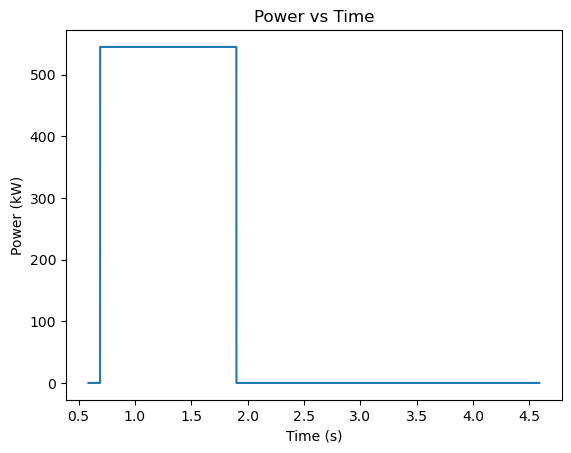

In [5]:
launchers = data['launchers'][0][0][0]

freq = data['frequencies'][0][0][0] # In GHz


t = data['timepoints'][0][0] # In s
P = data['powers'][0][0] # In kW


centerpoint = data['centerpoint'][0][0]
x0 = centerpoint['x'][0][0][0] # In cm
y0 = centerpoint['y'][0][0][0]  # In cm
z0 = centerpoint['z'][0][0][0] # In cm

tordeg = data['phi'][0][0][0] # In degrees, counterclokcwise seen from above, with 0 pointing to axis
poldeg = data['theta'][0][0][0] # In degrees, counterclockwise seen from in front, with 0 pointing to axis

beamwidth = data['beamwidth'][0][0][0] # In cm

curv_rad = data['curv_rad'][0][0][0] # In cm

# Print the results
print('Launchers:', launchers)
print(f'Frequencies: {freq}GHz')
print('Centerpoint (cm):', x0, y0, z0)
print(f'Toroidal angle: {tordeg}°')
print(f'Poloidal angle: {poldeg}°')
print(f'Beamwidth: {beamwidth}cm')
print(f'Curvature radius: {curv_rad}cm')

plt.plot(t, P)
plt.xlabel('Time (s)')
plt.ylabel('Power (kW)')
plt.title('Power vs Time')
#plt.xlim(0.7, 1.3)
plt.show()



In [6]:
# Calculate average power over time window

t_center = 1.05 # s
dt = 0.1 # s

t_start = t_center - dt/2
t_end = t_center + dt/2

P_avg = np.mean(P[(t > t_start) & (t < t_end)])
print(f'Average power over {dt}s window centered at {t_center}s: {P_avg}kW')

Average power over 0.1s window centered at 1.05s: 545.16650390625kW
